In [1]:
##############################################################################################################
# DESCRIPTION: Carga un modelo.
#              
# RESULTS:     VI0342_04_00noisy_idx014 es un ejemplo de imagen que puntúa bien pero no.
#              
##############################################################################################################

In [2]:
######################
# CONFIG & HYPERPARAMS
######################
import os, sys

IMG_WIDTH = 64
IMG_HEIGHT = 64

IMG_CASE = str(IMG_WIDTH) +  "/0001_0010"
SAVED_MODEL = "0001_0010-64-unet-xn2"

class RadianceLimits:
    pass

radiance_limits = RadianceLimits()
radiance_limits.noisy_min = 0
radiance_limits.noisy_max = 0.1418
radiance_limits.nitid_min = 0
radiance_limits.nitid_max = 0.2947

In [3]:
##################
# PATHS
##################

IMG_PATH = os.path.abspath(os.path.join('../../../dataset/cases/', IMG_CASE))
IMG_PATH_VALID = os.path.join( IMG_PATH , 'validation')
IMG_PATH_TEST = IMG_PATH + "/test/"
IMG_PATH_TRAIN = IMG_PATH

DEST_TESTS = os.path.abspath(os.path.join('../../../out_tests/', SAVED_MODEL))

In [4]:
##################
# IMPORTS
##################

import tensorflow as tf
from tensorflow.compat.v1 import InteractiveSession

config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

import numpy as np
import tensorflow 
from numpy.random import seed
seed(1)
tensorflow.random.set_seed(2)
import os, sys
module_path = os.path.abspath(os.path.join('../../support/'))
if module_path not in sys.path:
    sys.path.append(module_path)

import DatasetUtilsTifF as dsutils
import ReportsK as reports
import keras.models

In [5]:
##################
# PREPARE DATA
##################

train_noisy_files, train_nitid_files, train_noisy, train_nitid \
    = dsutils.readDataset( IMG_PATH_TRAIN, IMG_WIDTH, IMG_HEIGHT, radiance_limits)

val_noisy_files, val_nitid_files, val_noisy, val_nitid \
    = dsutils.readDataset( IMG_PATH_VALID, IMG_WIDTH, IMG_HEIGHT, radiance_limits)

train_noisy, train_nitid \
    = dsutils.reshapeDataset( train_noisy, train_nitid, IMG_WIDTH, IMG_HEIGHT )

val_noisy, val_nitid \
    = dsutils.reshapeDataset( val_noisy, val_nitid, IMG_WIDTH, IMG_HEIGHT )

Read dataset. Path: C:\Projects\VenusDenoise\dataset\cases\64\0001_0010
Noisy files:19657
Nitid files:19657
Read dataset. Path: C:\Projects\VenusDenoise\dataset\cases\64\0001_0010\validation
Noisy files:4900
Nitid files:4900


In [6]:
model = keras.models.load_model(os.path.abspath(os.path.join('../../../saves/' + SAVED_MODEL)), compile=False)

In [7]:
##################
# PREDICTIONS
##################
ACCURACY_THRESHOLD = 0.01
predictions_metrics, predictions_headers \
    = reports.calcPredictionMetrics( model, val_noisy, val_nitid, ACCURACY_THRESHOLD, \
                                    save_pred = True, save_path = DEST_TESTS, \
                                    noisy_files = val_noisy_files, nitid_files = val_nitid_files, \
                                    max_nitid= radiance_limits.nitid_max  )

Black image found
Black image found
Images count =4900
Best RMSENZ  =4654 (0.95)
Best MAENZ   =4637 (0.95)
Best PSNR    =4654 (0.95)
Best Accuracy=4531 (0.92)
RMSE-NZ  Pred=0.0341  Noisy=0.1031
MAE-NZ   Pred=0.0273  Noisy=0.0937
PSNR     Pred=17.5 dB Noisy=8.8 dB
Accuracy Pred=0.35    Noisy=0.12
SSM      Pred=0.80    Noisy=0.43
HOG MSE  Pred=0.09    Noisy=0.08


In [8]:
reports.saveMetrics( DEST_TESTS, SAVED_MODEL, predictions_headers, predictions_metrics )
#reports.saveScores( DEST_TESTS, SAVED_MODEL, predictions_metrics )

In [9]:
len(predictions_metrics)

4900

Read dataset. Path: C:\Projects\VenusDenoise\dataset\cases\64\0001_0010/test/
Noisy files:17
Nitid files:17
Index:0
C:\Projects\VenusDenoise\dataset\cases\64\0001_0010/test\VI0025_06_00_2_noisy_idx006.tif
C:\Projects\VenusDenoise\dataset\cases\64\0001_0010/test\VI0025_06_00_2_nitid_idx008.tif


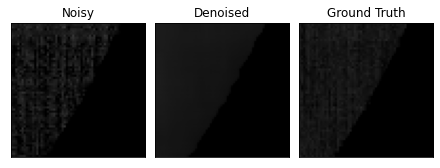

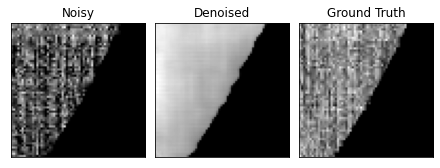

RMSE-NZ  Pred=0.0191  Noisy=0.0423 BEST
MAE-NZ   Pred=0.0111  Noisy=0.0298 BEST
PSNR     Pred=18.0 dB Noisy=11.1 dB BEST
Accuracy Pred=0.62    Noisy=0.36 BEST
SSM      Pred=0.82    Noisy=0.66
HOG MSE  Pred=0.07    Noisy=0.01
******************************************************
Index:1
C:\Projects\VenusDenoise\dataset\cases\64\0001_0010/test\VI0025_06_01_5_noisy_idx020.tif
C:\Projects\VenusDenoise\dataset\cases\64\0001_0010/test\VI0025_06_01_5_nitid_idx017.tif


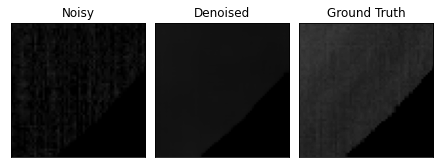

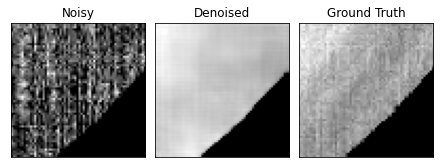

RMSE-NZ  Pred=0.0806  Noisy=0.1180 BEST
MAE-NZ   Pred=0.0696  Noisy=0.1096 BEST
PSNR     Pred=9.4 dB Noisy=6.1 dB BEST
Accuracy Pred=0.21    Noisy=0.07 BEST
SSM      Pred=0.68    Noisy=0.60
HOG MSE  Pred=0.03    Noisy=0.09
******************************************************
Index:2
C:\Projects\VenusDenoise\dataset\cases\64\0001_0010/test\VI0330_02_04_9_noisy_idx157.tif
C:\Projects\VenusDenoise\dataset\cases\64\0001_0010/test\VI0330_02_04_9_nitid_idx146.tif


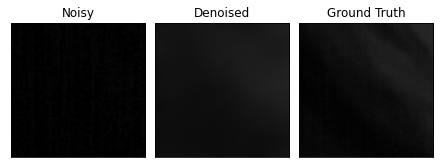

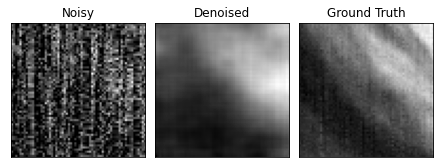

RMSE-NZ  Pred=0.0281  Noisy=0.0587 BEST
MAE-NZ   Pred=0.0243  Noisy=0.0477 BEST
PSNR     Pred=15.0 dB Noisy=8.6 dB BEST
Accuracy Pred=0.18    Noisy=0.13 BEST
SSM      Pred=0.80    Noisy=0.23
HOG MSE  Pred=0.12    Noisy=0.07
******************************************************
Index:3
C:\Projects\VenusDenoise\dataset\cases\64\0001_0010/test\VI0330_03_03_11_noisy_idx123.tif
C:\Projects\VenusDenoise\dataset\cases\64\0001_0010/test\VI0330_03_03_11_nitid_idx134.tif


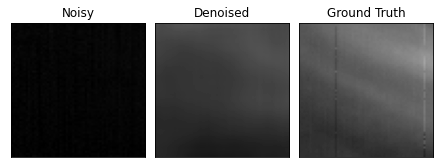

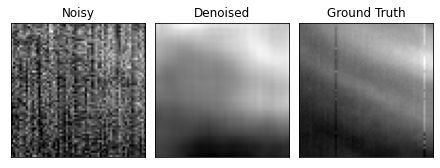

RMSE-NZ  Pred=0.1309  Noisy=0.3357 BEST
MAE-NZ   Pred=0.1202  Noisy=0.3214 BEST
PSNR     Pred=13.8 dB Noisy=5.6 dB BEST
Accuracy Pred=0.00    Noisy=0.00 BEST
SSM      Pred=0.77    Noisy=0.15
HOG MSE  Pred=0.13    Noisy=0.11
******************************************************
Index:4
C:\Projects\VenusDenoise\dataset\cases\64\0001_0010/test\VI0330_03_03_13_noisy_idx123.tif
C:\Projects\VenusDenoise\dataset\cases\64\0001_0010/test\VI0330_03_03_13_nitid_idx134.tif


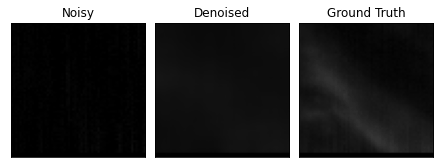

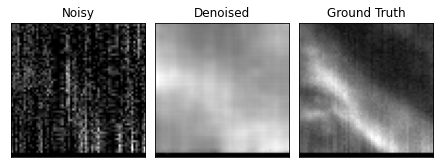

RMSE-NZ  Pred=0.0443  Noisy=0.0869 BEST
MAE-NZ   Pred=0.0342  Noisy=0.0747 BEST
PSNR     Pred=13.5 dB Noisy=7.7 dB BEST
Accuracy Pred=0.15    Noisy=0.01 BEST
SSM      Pred=0.79    Noisy=0.26
HOG MSE  Pred=0.05    Noisy=0.11
******************************************************
Index:5
C:\Projects\VenusDenoise\dataset\cases\64\0001_0010/test\VI0330_03_03_3_noisy_idx123.tif
C:\Projects\VenusDenoise\dataset\cases\64\0001_0010/test\VI0330_03_03_3_nitid_idx134.tif


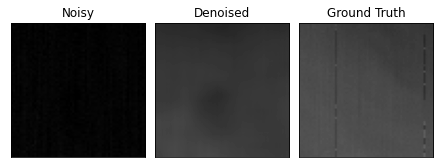

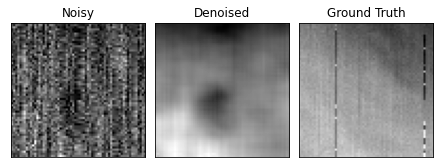

RMSE-NZ  Pred=0.0694  Noisy=0.2662 BEST
MAE-NZ   Pred=0.0660  Noisy=0.2643 BEST
PSNR     Pred=14.7 dB Noisy=3.1 dB BEST
Accuracy Pred=0.00    Noisy=0.00 BEST
SSM      Pred=0.85    Noisy=0.14
HOG MSE  Pred=0.09    Noisy=0.10
******************************************************
Index:6
C:\Projects\VenusDenoise\dataset\cases\64\0001_0010/test\VI0330_03_03_5_noisy_idx123.tif
C:\Projects\VenusDenoise\dataset\cases\64\0001_0010/test\VI0330_03_03_5_nitid_idx134.tif


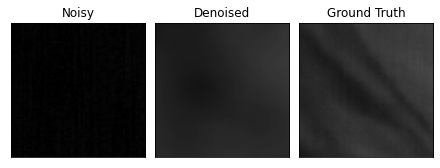

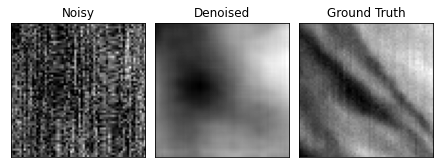

RMSE-NZ  Pred=0.0435  Noisy=0.1729 BEST
MAE-NZ   Pred=0.0379  Noisy=0.1686 BEST
PSNR     Pred=16.4 dB Noisy=4.4 dB BEST
Accuracy Pred=0.12    Noisy=0.00 BEST
SSM      Pred=0.85    Noisy=0.15
HOG MSE  Pred=0.11    Noisy=0.15
******************************************************
Index:7
C:\Projects\VenusDenoise\dataset\cases\64\0001_0010/test\VI0338_04_00_10_noisy_idx006.tif
C:\Projects\VenusDenoise\dataset\cases\64\0001_0010/test\VI0338_04_00_10_nitid_idx008.tif


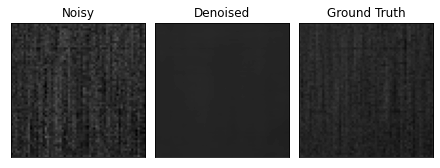

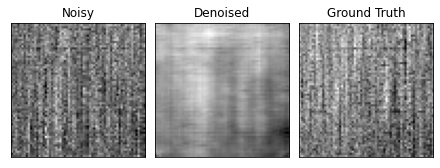

RMSE-NZ  Pred=0.0273  Noisy=0.0606 BEST
MAE-NZ   Pred=0.0217  Noisy=0.0478 BEST
PSNR     Pred=19.0 dB Noisy=12.0 dB BEST
Accuracy Pred=0.29    Noisy=0.15 BEST
SSM      Pred=0.61    Noisy=0.32
HOG MSE  Pred=0.05    Noisy=0.03
******************************************************
Index:8
C:\Projects\VenusDenoise\dataset\cases\64\0001_0010/test\VI0339_04_03_5_noisy_idx123.tif
C:\Projects\VenusDenoise\dataset\cases\64\0001_0010/test\VI0339_04_03_5_nitid_idx134.tif


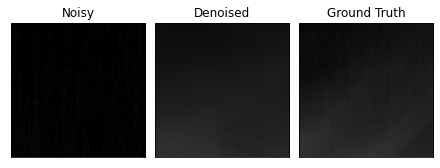

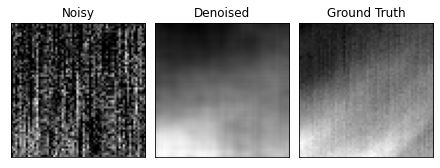

RMSE-NZ  Pred=0.0137  Noisy=0.1061 BEST
MAE-NZ   Pred=0.0105  Noisy=0.0983 BEST
PSNR     Pred=23.6 dB Noisy=5.8 dB BEST
Accuracy Pred=0.58    Noisy=0.00 BEST
SSM      Pred=0.94    Noisy=0.16
HOG MSE  Pred=0.18    Noisy=0.04
******************************************************
Index:9
C:\Projects\VenusDenoise\dataset\cases\64\0001_0010/test\VI0339_05_03_8_noisy_idx123.tif
C:\Projects\VenusDenoise\dataset\cases\64\0001_0010/test\VI0339_05_03_8_nitid_idx134.tif


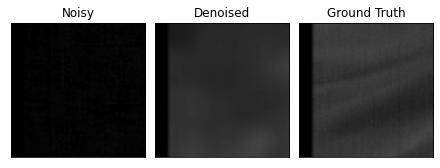

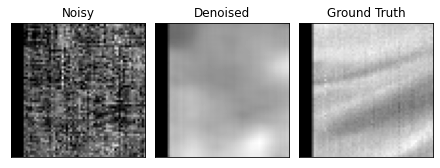

RMSE-NZ  Pred=0.0492  Noisy=0.1969 BEST
MAE-NZ   Pred=0.0364  Noisy=0.1941 BEST
PSNR     Pred=15.3 dB Noisy=3.2 dB BEST
Accuracy Pred=0.27    Noisy=0.00 BEST
SSM      Pred=0.89    Noisy=0.15
HOG MSE  Pred=0.05    Noisy=0.24
******************************************************
Index:10
C:\Projects\VenusDenoise\dataset\cases\64\0001_0010/test\VI0353_09_00_15_noisy_idx006.tif
C:\Projects\VenusDenoise\dataset\cases\64\0001_0010/test\VI0353_09_00_15_nitid_idx008.tif


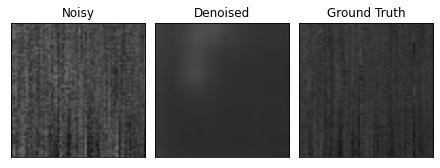

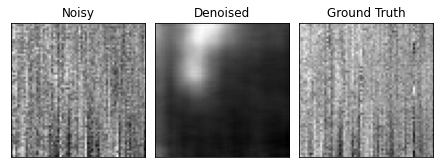

RMSE-NZ  Pred=0.0340  Noisy=0.0925 BEST
MAE-NZ   Pred=0.0262  Noisy=0.0774 BEST
PSNR     Pred=18.8 dB Noisy=10.1 dB BEST
Accuracy Pred=0.25    Noisy=0.06 BEST
SSM      Pred=0.62    Noisy=0.30
HOG MSE  Pred=0.07    Noisy=0.03
******************************************************
Index:11
C:\Projects\VenusDenoise\dataset\cases\64\0001_0010/test\VI0357_01_00_5_noisy_idx006.tif
C:\Projects\VenusDenoise\dataset\cases\64\0001_0010/test\VI0357_01_00_5_nitid_idx008.tif


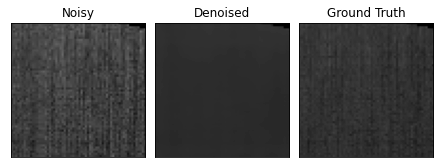

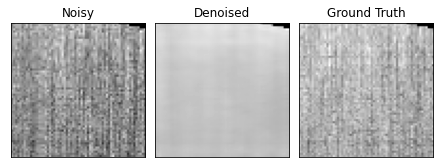

RMSE-NZ  Pred=0.0316  Noisy=0.0770 BEST
MAE-NZ   Pred=0.0264  Noisy=0.0644 BEST
PSNR     Pred=19.0 dB Noisy=11.2 dB BEST
Accuracy Pred=0.20    Noisy=0.08 BEST
SSM      Pred=0.69    Noisy=0.35
HOG MSE  Pred=0.10    Noisy=0.03
******************************************************
Index:12
C:\Projects\VenusDenoise\dataset\cases\64\0001_0010/test\VI0357_01_01_7_noisy_idx020.tif
C:\Projects\VenusDenoise\dataset\cases\64\0001_0010/test\VI0357_01_01_7_nitid_idx017.tif


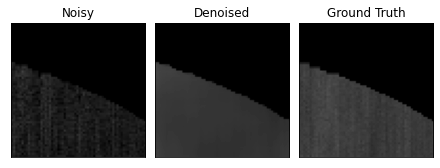

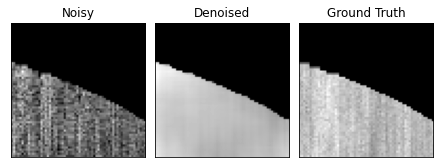

RMSE-NZ  Pred=0.0296  Noisy=0.1235 BEST
MAE-NZ   Pred=0.0180  Noisy=0.1063 BEST
PSNR     Pred=20.6 dB Noisy=8.2 dB BEST
Accuracy Pred=0.55    Noisy=0.19 BEST
SSM      Pred=0.87    Noisy=0.70
HOG MSE  Pred=0.08    Noisy=0.01
******************************************************
Index:13
C:\Projects\VenusDenoise\dataset\cases\64\0001_0010/test\VI0618_03_01_9_noisy_idx020.tif
C:\Projects\VenusDenoise\dataset\cases\64\0001_0010/test\VI0618_03_01_9_nitid_idx017.tif


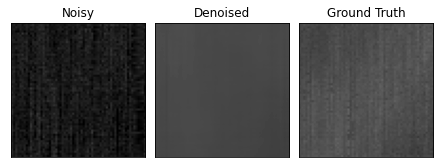

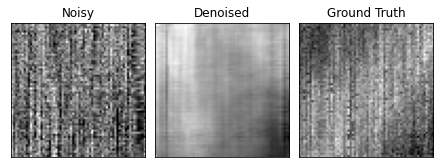

RMSE-NZ  Pred=0.0405  Noisy=0.2174 BEST
MAE-NZ   Pred=0.0343  Noisy=0.2121 BEST
PSNR     Pred=19.8 dB Noisy=5.2 dB BEST
Accuracy Pred=0.15    Noisy=0.00 BEST
SSM      Pred=0.70    Noisy=0.26
HOG MSE  Pred=0.18    Noisy=0.05
******************************************************
Index:14
C:\Projects\VenusDenoise\dataset\cases\64\0001_0010/test\VI0720_00_04_11_noisy_idx157.tif
C:\Projects\VenusDenoise\dataset\cases\64\0001_0010/test\VI0720_00_04_11_nitid_idx146.tif


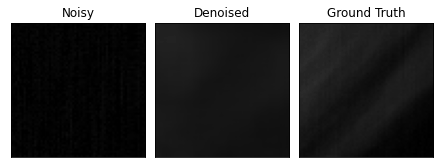

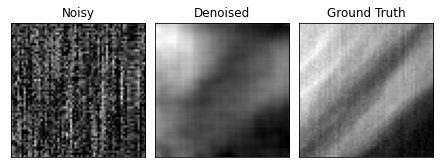

RMSE-NZ  Pred=0.0289  Noisy=0.0873 BEST
MAE-NZ   Pred=0.0242  Noisy=0.0780 BEST
PSNR     Pred=15.8 dB Noisy=6.2 dB BEST
Accuracy Pred=0.21    Noisy=0.06 BEST
SSM      Pred=0.84    Noisy=0.27
HOG MSE  Pred=0.08    Noisy=0.17
******************************************************
Index:15
C:\Projects\VenusDenoise\dataset\cases\64\0001_0010/test\VI0720_01_00_2_noisy_idx006.tif
C:\Projects\VenusDenoise\dataset\cases\64\0001_0010/test\VI0720_01_00_2_nitid_idx008.tif


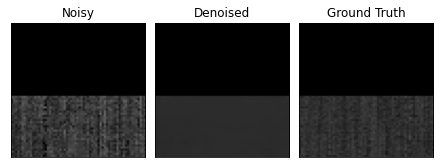

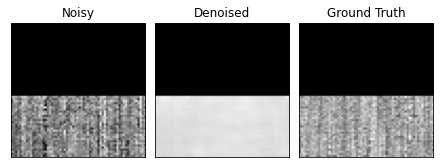

RMSE-NZ  Pred=0.0234  Noisy=0.0789 BEST
MAE-NZ   Pred=0.0128  Noisy=0.0631 BEST
PSNR     Pred=21.8 dB Noisy=11.2 dB BEST
Accuracy Pred=0.65    Noisy=0.09 BEST
SSM      Pred=0.79    Noisy=0.66
HOG MSE  Pred=0.20    Noisy=0.02
******************************************************
Index:16
C:\Projects\VenusDenoise\dataset\cases\64\0001_0010/test\VI0726_03_01_15_noisy_idx020.tif
C:\Projects\VenusDenoise\dataset\cases\64\0001_0010/test\VI0726_03_01_15_nitid_idx017.tif


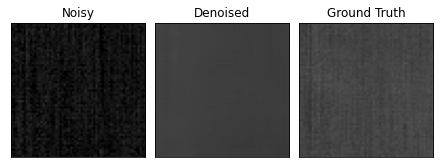

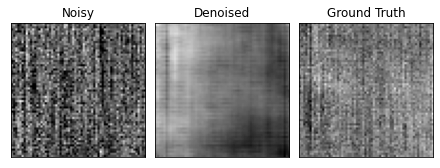

RMSE-NZ  Pred=0.0347  Noisy=0.2053 BEST
MAE-NZ   Pred=0.0292  Noisy=0.2012 BEST
PSNR     Pred=20.2 dB Noisy=4.7 dB BEST
Accuracy Pred=0.18    Noisy=0.00 BEST
SSM      Pred=0.74    Noisy=0.24
HOG MSE  Pred=0.09    Noisy=0.05
******************************************************


In [10]:
test_noisy_files, test_nitid_files, test_noisy, test_nitid \
    = dsutils.readDataset( IMG_PATH_TEST, IMG_WIDTH, IMG_HEIGHT, radiance_limits)

test_noisy, test_nitid \
    = dsutils.reshapeDataset( test_noisy, test_nitid, IMG_WIDTH, IMG_HEIGHT )

test_indexes = np.arange(0,test_noisy.shape[0])

reports.predictByIndexes( model, test_noisy, test_nitid, test_noisy_files, test_nitid_files, \
                        test_indexes, ACCURACY_THRESHOLD )

Index:2
C:\Projects\VenusDenoise\dataset\cases\64\0001_0010\validation\VI0025_06_00_1_noisy_idx006.tif
C:\Projects\VenusDenoise\dataset\cases\64\0001_0010\validation\VI0025_06_00_1_nitid_idx008.tif


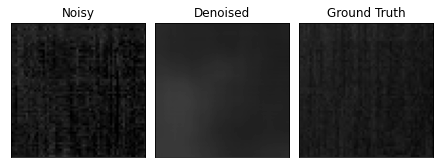

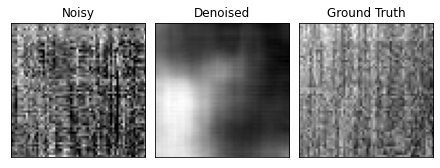

RMSE-NZ  Pred=0.0676  Noisy=0.0487 WORST
MAE-NZ   Pred=0.0574  Noisy=0.0392 WORST
PSNR     Pred=9.1 dB Noisy=11.9 dB WORST
Accuracy Pred=0.07    Noisy=0.16 WORST
SSM      Pred=0.65    Noisy=0.37
HOG MSE  Pred=0.10    Noisy=0.04
******************************************************


In [11]:
test_indexes = np.array([2])
reports.predictByIndexes( model, val_noisy, val_nitid, val_noisy_files, val_nitid_files, \
                        test_indexes, ACCURACY_THRESHOLD, \
                        save_pred = True, save_folder_name = DEST_TESTS )